In [31]:
from google.colab import files
uploaded = files.upload()

Saving hpi_master.csv to hpi_master.csv


In [2]:
import pandas as pd

df = pd.read_csv("hpi_master.csv")
df.head() #shows the first 5 rows of the dataframe by default

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.87
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.32,100.90
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.96
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.31


In [4]:
texas_cities_df = df[df["place_name"].str.contains('TX')]
texas_cities_df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
4170,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,2,108.06,NaN
4171,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,3,108.28,NaN
4172,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,4,94.80,NaN
4173,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,1,101.63,NaN
4174,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,2,100.89,NaN


In [6]:
texas_cities_df["place_name"].unique() #lists all cities contained in dataset

array(['Abilene, TX', 'Amarillo, TX', 'Austin-Round Rock-San Marcos, TX',
       'Beaumont-Port Arthur, TX', 'Brownsville-Harlingen, TX',
       'College Station-Bryan, TX', 'Corpus Christi, TX',
       'Dallas-Plano-Irving, TX (MSAD)', 'El Paso, TX',
       'Fort Worth-Arlington-Grapevine, TX (MSAD)',
       'Houston-Pasadena-The Woodlands, TX', 'Killeen-Temple, TX',
       'Laredo, TX', 'Longview, TX', 'Lubbock, TX',
       'McAllen-Edinburg-Mission, TX', 'Midland, TX', 'Odessa, TX',
       'San Angelo, TX', 'San Antonio-New Braunfels, TX',
       'Sherman-Denison, TX', 'Texarkana, TX-AR', 'Tyler, TX',
       'Victoria, TX', 'Waco, TX', 'Wichita Falls, TX'], dtype=object)

In [10]:
texas_cities_df = texas_cities_df.dropna(subset=['index_sa']) #removes metros with empty seasonally adjusted indexes

In [11]:
avg_hpi_per_metro = texas_cities_df.groupby('place_name')['index_sa'].mean().reset_index()
print(avg_hpi_per_metro) #note that some metro cities were missing due to missing index_sa data

                                  place_name    index_sa
0           Austin-Round Rock-San Marcos, TX  314.606691
1             Dallas-Plano-Irving, TX (MSAD)  201.967518
2                                El Paso, TX  174.440216
3  Fort Worth-Arlington-Grapevine, TX (MSAD)  196.386259
4         Houston-Pasadena-The Woodlands, TX  208.059748
5              San Antonio-New Braunfels, TX  217.470576


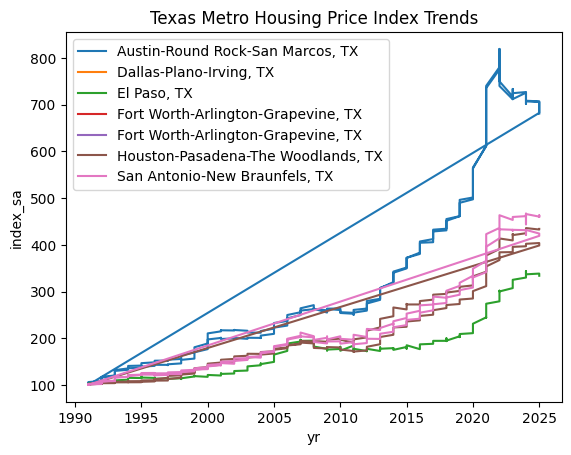

In [12]:
import matplotlib.pyplot as plt

# Example: line plot for 3 metros
metros_to_plot = ['Austin-Round Rock-San Marcos, TX', 'Dallas-Plano-Irving, TX', 'El Paso, TX', 'Fort Worth-Arlington-Grapevine, TX', 'Fort Worth-Arlington-Grapevine, TX', 'Houston-Pasadena-The Woodlands, TX', 'San Antonio-New Braunfels, TX']

for metro in metros_to_plot:
    metro_df = texas_cities_df[texas_cities_df['place_name'] == metro]
    plt.plot(metro_df['yr'], metro_df['index_sa'], label=metro)

plt.xlabel('Year')
plt.ylabel('HPI')
plt.title('Texas Metro Housing Price Index Trends')
plt.legend()
plt.show()


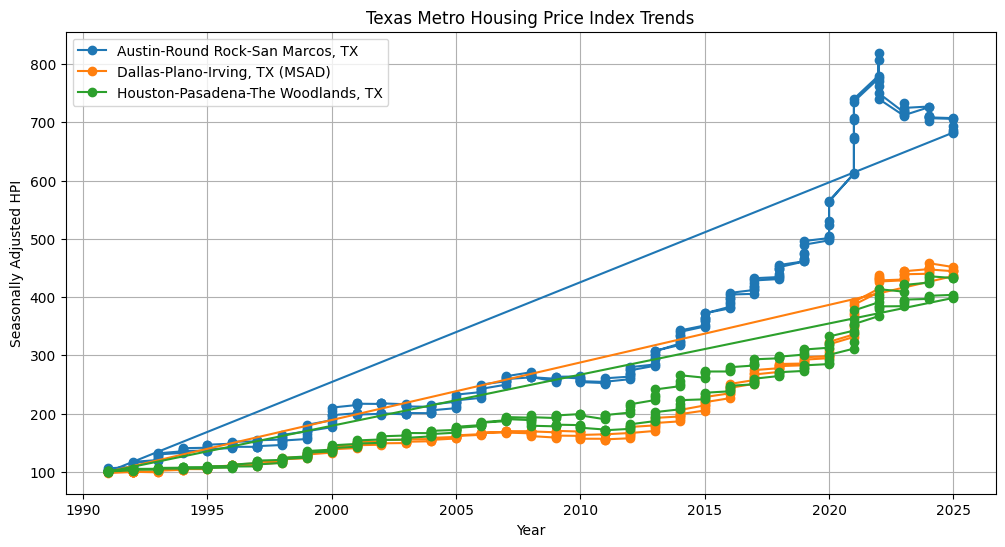

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("hpi_master.csv")

# Filter Texas metros
texas_cities_df = df[df['place_name'].str.contains('TX')].copy()

# Forward-fill missing index_sa values
texas_cities_df['index_sa'] = texas_cities_df.groupby('place_name')['index_sa'].ffill()

# Define metros to compare
metros_to_plot = [
    'Austin-Round Rock-San Marcos, TX',
    'Dallas-Plano-Irving, TX (MSAD)',
    'Houston-Pasadena-The Woodlands, TX'
]

# Plot trends
plt.figure(figsize=(12,6))
for metro in metros_to_plot:
    metro_df = texas_cities_df[texas_cities_df['place_name'] == metro]
    plt.plot(metro_df['yr'], metro_df['index_sa'], marker='o', label=metro)

plt.xlabel('Year')
plt.ylabel('Seasonally Adjusted HPI')
plt.title('Texas Metro Housing Price Index Trends')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Save the figure
plt.savefig('texas_metro_hpi_trends.png', dpi=300)  # high-quality PNG
plt.show()

<Figure size 640x480 with 0 Axes>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import os

# Set working directory to your project folder
os.chdir('/content/drive/MyDrive/Texas_Housing_Project')

# Confirm current directory
print(os.getcwd())


/content/drive/MyDrive/Texas_Housing_Project


In [28]:
import os

os.makedirs('/content/drive/MyDrive/Texas_Housing_Project', exist_ok=True)

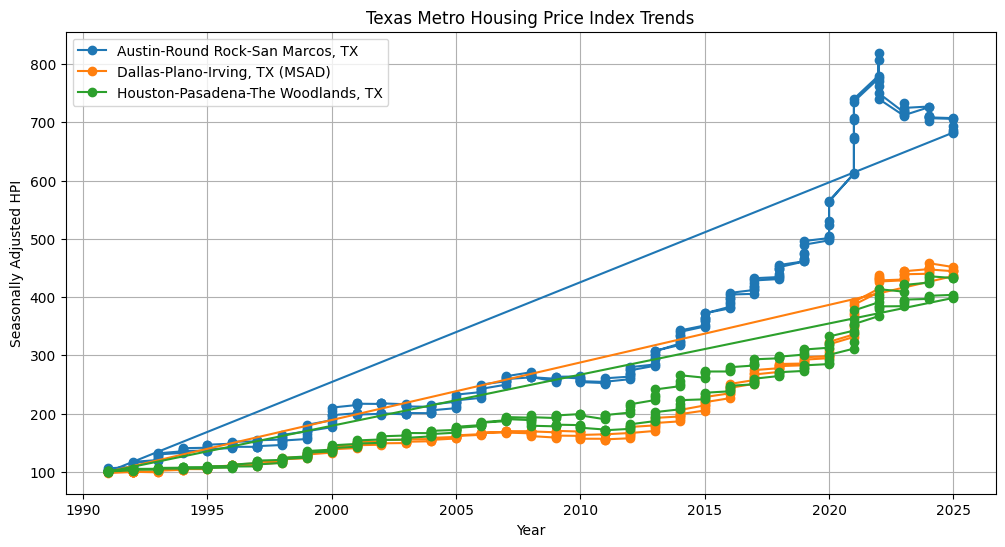

In [35]:
import matplotlib.pyplot as plt
import os

# Ensure images folder exists
if not os.path.exists('images'):
    os.makedirs('images')


# Load dataset
df = pd.read_csv("hpi_master.csv")

# Filter Texas metros
texas_cities_df = df[df['place_name'].str.contains('TX')].copy()

# Forward-fill missing index_sa values
texas_cities_df['index_sa'] = texas_cities_df.groupby('place_name')['index_sa'].ffill()

# Define metros to compare
metros_to_plot = [
    'Austin-Round Rock-San Marcos, TX',
    'Dallas-Plano-Irving, TX (MSAD)',
    'Houston-Pasadena-The Woodlands, TX'
]

# Plot trends
plt.figure(figsize=(12,6))
for metro in metros_to_plot:
    metro_df = texas_cities_df[texas_cities_df['place_name'] == metro]
    plt.plot(metro_df['yr'], metro_df['index_sa'], marker='o', label=metro)

plt.xlabel('Year')
plt.ylabel('Seasonally Adjusted HPI')
plt.title('Texas Metro Housing Price Index Trends')
plt.legend()
plt.grid(True)
plt.savefig('images/example_graph.png', dpi=300)
plt.show()
